In [ ]:
pip install bambi

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import bambi as bmb
from IPython.core.pylabtools import figsize

figsize(10, 10)
sns.set_theme()

df = pd.read_csv(
    "https://media.githubusercontent.com/media/khuyentran1401/Data-science"
    "/master/statistics/bayes_linear_regression/student-score.csv"
)

<IPython.core.display.Javascript object>

In [6]:
df.head(10)

,mat,por
0,5,0
1,5,9
2,7,12
3,15,14
4,6,11
5,15,12
6,12,13
7,6,10
8,16,15
9,14,12


<IPython.core.display.Javascript object>

In [5]:
mat, por = df["mat"].values, df["por"].values

<IPython.core.display.Javascript object>

$$y = \beta_0 + \beta_1 x_1 + \cdots + \beta_n x_n + \epsilon$$
$$ y = \beta_0 + \beta_1x + \epsilon$$
$$Y= \beta^{T}X + \epsilon$$

\begin{align*}
RSS(\beta) &= \sum_{i=1}^N (y_i -\hat{y}_i)^2\\
&= \sum_{i=1}^N (y_i -\beta^{T}x_i)^2\\
\end{align*}

In [8]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(mat.reshape(-1, 1), por)
predict_line = linear_model.predict(mat.reshape(-1, 1))

<IPython.core.display.Javascript object>

In [15]:
linear_model.coef_

array([0.4335796])

<IPython.core.display.Javascript object>

In [63]:
linear_model.intercept_

7.403346211071996

<IPython.core.display.Javascript object>

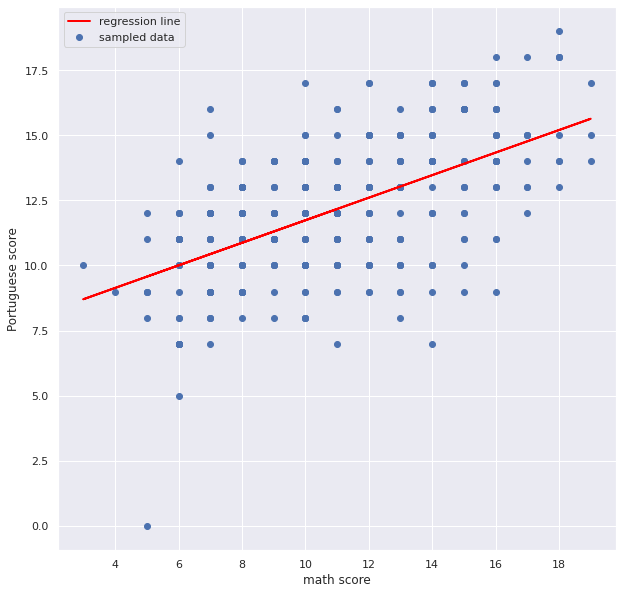

<IPython.core.display.Javascript object>

In [11]:
plt.scatter(mat, por, label="sampled data")
plt.plot(mat, predict_line, label="regression line", lw=2.0, color="red")
plt.xlabel("math score")
plt.ylabel("Portuguese score")
plt.legend(loc=0)

In [17]:
gauss_model = bmb.Model("por ~ mat", data=df)

<IPython.core.display.Javascript object>

In [18]:
# Fit the model using 1000 on each of 4 chains
gauss_fitted = gauss_model.fit(draws=1000, chains=4)
gauss_model.predict(gauss_fitted, kind="pps", draws=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [por_sigma, Intercept, mat]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


<IPython.core.display.Javascript object>

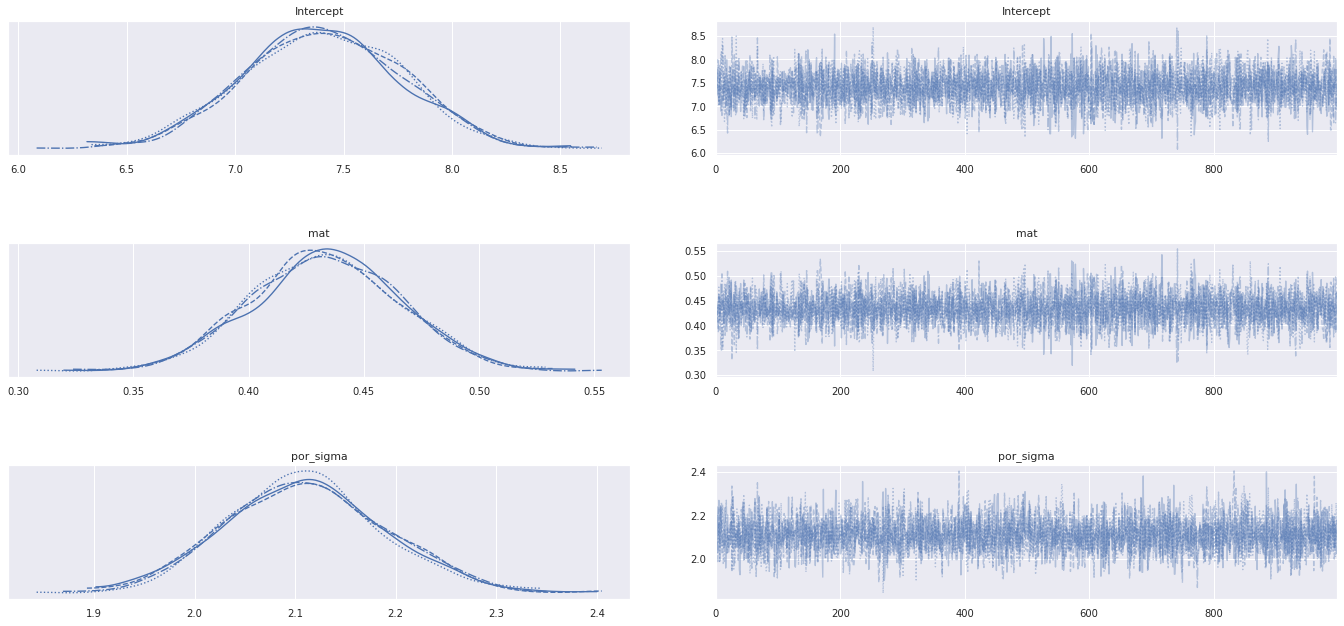

<IPython.core.display.Javascript object>

In [48]:
# Use ArviZ to plot the results
az.plot_trace(gauss_fitted, figsize=(20, 10))
plt.tight_layout()

Text(0.5, 1.0, 'Probability distribution of three different Normal random variables')

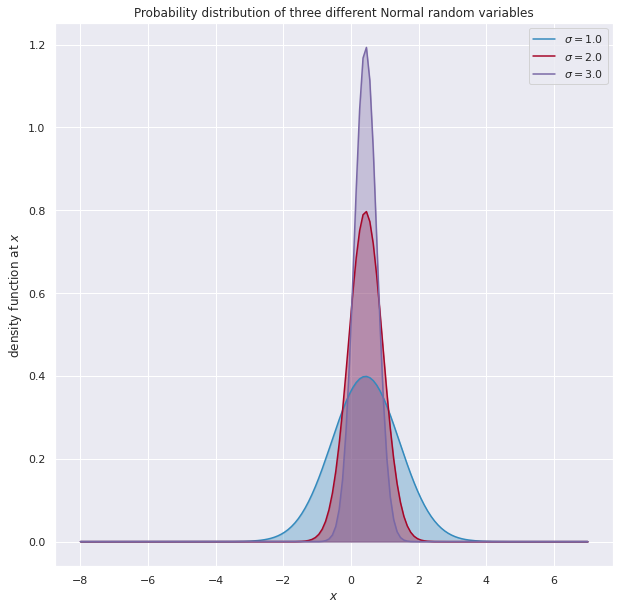

<IPython.core.display.Javascript object>

In [74]:
import scipy.stats as stats

nor = stats.norm
x = np.linspace(-8, 7, 150)
mu = [0.43] * 3
sigma = [1, 2, 3]
colors = ["#348ABD", "#A60628", "#7A68A6"]
parameters = zip(mu, sigma, colors)

for _mu, _sigma, _color in parameters:
    plt.plot(
        x,
        nor.pdf(x, _mu, scale=1.0 / _sigma),
        label="$\\sigma = %.1f$" % (_sigma),
        color=_color,
    )
    plt.fill_between(x, nor.pdf(x, _mu, scale=1.0 / _sigma), color=_color, alpha=0.33)

plt.legend(loc="upper right")
plt.xlabel("$x$")
plt.ylabel("density function at $x$")
plt.title(
    "Probability distribution of three different Normal random \
variables"
)

<AxesSubplot:xlabel='por / por'>

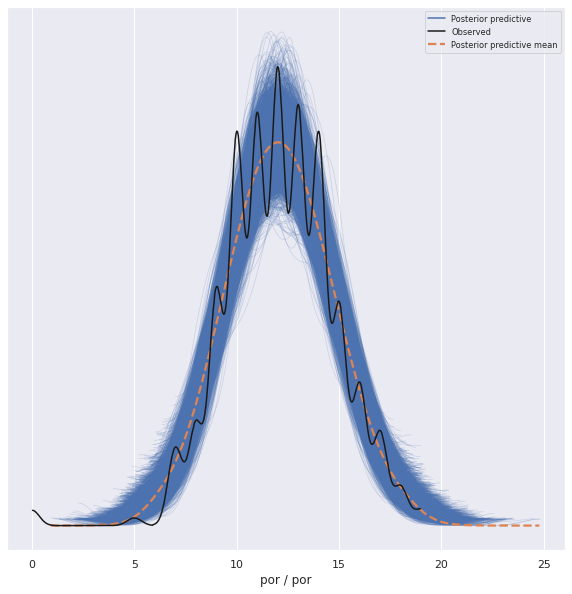

<IPython.core.display.Javascript object>

In [75]:
az.plot_ppc(gauss_fitted)

In [112]:
gauss_fitted.posterior.mat.values.mean()

0.43346411871369533

<IPython.core.display.Javascript object>

In [114]:
gauss_fitted.posterior.Intercept.values.mean()

7.403637994335104

<IPython.core.display.Javascript object>

In [117]:
def plot_sample_prediction(mat, por, fitted):

    # Plot Data
    plt.scatter(mat, por, label="data")

    x_range = np.linspace(min(mat), max(mat), 2000)

    y_pred = fitted.posterior.mat.values.mean() * x_range + fitted.posterior.Intercept.values.mean()
        
    # Plot mean prediction    
    plt.plot(x_range, y_pred,color="black", label="Mean regression line", lw=2)

    # Plot sample predictions
    for i in range(10):
        y_pred = fitted.posterior.mat.values[0, i] * x_range + fitted.posterior.Intercept.values[0, i]
        plt.plot(x_range, y_pred,
            color="green",linestyle="-.",
            label="Sample regression line",
            alpha = 0.5
            )
        
    plt.legend(loc=0);


<IPython.core.display.Javascript object>

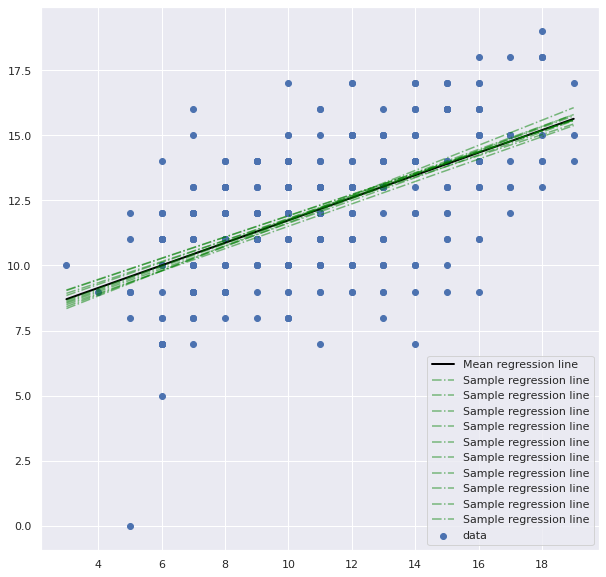

<IPython.core.display.Javascript object>

In [118]:
plot_sample_prediction(mat, por, gauss_fitted)

In [119]:
def plot_interval_prediction(mat, por, fitted):
    # Plot Data
    plt.scatter(mat, por, label="data")

    x_range = np.linspace(min(mat), max(mat), 2000)
    y_pred = fitted.posterior.mat.values.mean() * x_range + fitted.posterior.Intercept.values.mean()
    
    # Plot mean prediction  
    plt.plot(x_range, y_pred,
            color="black",
            label="Mean regression line"
            )
            
    # Plot HDIs
    for interval in [0.38, 0.68]:
        az.plot_hdi(mat, fitted.posterior_predictive.por,
                    hdi_prob=interval, color="firebrick")

    plt.legend(loc=0);


<IPython.core.display.Javascript object>

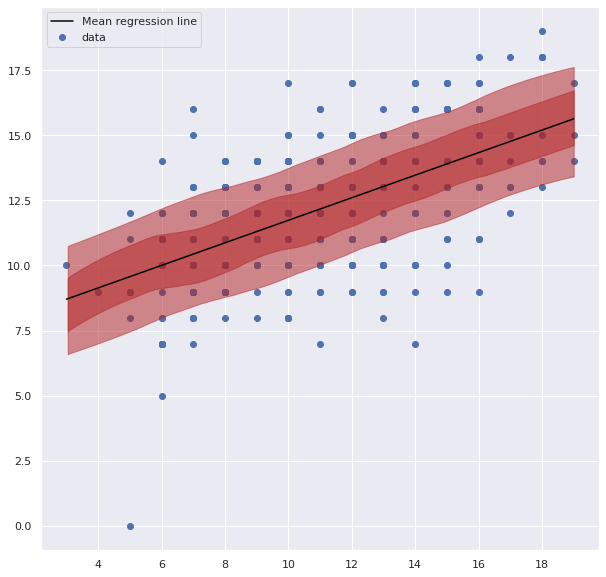

<IPython.core.display.Javascript object>

In [120]:
plot_interval_prediction(mat, por, gauss_fitted)